# NBA data workout

# 1.Import library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

# 2.Reading data file

In [2]:
data_nba = pd.read_csv('NBA_data.csv')

In [3]:
data_nba.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [4]:
data_nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes Played            495 non-null    float64
 5   True Shooting(%)          494 non-null    float64
 6   Threepoint Attempt rate   495 non-null    float64
 7   Free throw attempt rate   495 non-null    float64
 8   Player Efficiency Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB



# 3.Data pre-processing

In [5]:
nba = pd.DataFrame(data_nba)

In [6]:
nba.head()

,Player,Position,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,PF,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,PG,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,C,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,C,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,C,35,18,480.0,0.542,0.298,0.093,15.2


In [7]:
nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 497 entries, 0 to 496
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Player                    497 non-null    object 
 1   Position                  497 non-null    object 
 2   Age                       497 non-null    int64  
 3   Games                     497 non-null    int64  
 4   Minutes Played            495 non-null    float64
 5   True Shooting(%)          494 non-null    float64
 6   Threepoint Attempt rate   495 non-null    float64
 7   Free throw attempt rate   495 non-null    float64
 8   Player Efficiency Rating  497 non-null    float64
dtypes: float64(5), int64(2), object(2)
memory usage: 35.1+ KB


In [8]:
nba = nba.drop('Position', 1)
nba

,Player,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,Precious Achiuwa,21,28,408.0,0.599,0.000,0.541,15.1
1,Jaylen Adams,24,6,17.0,0.125,0.250,0.000,-6.9
2,Steven Adams,27,27,760.0,0.592,NaN,0.397,15.9
3,Bam Adebayo,23,26,873.0,0.641,0.015,0.469,22.7
4,LaMarcus Aldridge,35,18,480.0,0.542,0.298,0.093,15.2
...,...,...,...,...,...,...,...,...
492,Delon Wright,28,28,823.0,0.559,0.298,0.346,16.6
493,Thaddeus Young,32,23,592.0,0.597,0.104,0.169,18.5
494,Trae Young,22,26,901.0,0.598,0.349,0.577,22.9
495,Cody Zeller,28,15,361.0,0.569,0.133,0.242,18.2


In [9]:
nba = nba.drop('Player', 1)
nba = nba.fillna(nba.mean())
nba

,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,21,28,408.0,0.599,0.000000,0.541,15.1
1,24,6,17.0,0.125,0.250000,0.000,-6.9
2,27,27,760.0,0.592,0.406362,0.397,15.9
3,23,26,873.0,0.641,0.015000,0.469,22.7
4,35,18,480.0,0.542,0.298000,0.093,15.2
...,...,...,...,...,...,...,...
492,28,28,823.0,0.559,0.298000,0.346,16.6
493,32,23,592.0,0.597,0.104000,0.169,18.5
494,22,26,901.0,0.598,0.349000,0.577,22.9
495,28,15,361.0,0.569,0.133000,0.242,18.2


# 4.Normalization techniques 

In [10]:
nba['Minutes Played'] = nba['Minutes Played'] / nba['Minutes Played'].abs().max()

,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
0,21,28,0.370572,0.599,0.000000,0.541,15.1
1,24,6,0.015441,0.125,0.250000,0.000,-6.9
2,27,27,0.690282,0.592,0.406362,0.397,15.9
3,23,26,0.792916,0.641,0.015000,0.469,22.7
4,35,18,0.435967,0.542,0.298000,0.093,15.2
...,...,...,...,...,...,...,...
492,28,28,0.747502,0.559,0.298000,0.346,16.6
493,32,23,0.537693,0.597,0.104000,0.169,18.5
494,22,26,0.818347,0.598,0.349000,0.577,22.9
495,28,15,0.327884,0.569,0.133000,0.242,18.2


<AxesSubplot:>

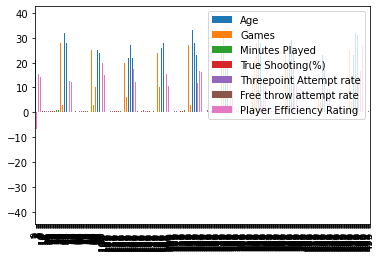

In [11]:
display(nba)
nba.plot(kind = 'bar')

In [12]:
nba.describe(include = 'all')

,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate,Player Efficiency Rating
count,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000,497.000000
mean,25.623742,18.456740,0.378286,0.538939,0.406362,0.274804,12.646278
std,4.054229,8.311394,0.269703,0.129965,0.233735,0.270104,7.404316
min,19.000000,1.000000,0.001817,0.000000,0.000000,0.000000,-40.900000
25%,22.000000,12.000000,0.118074,0.500000,0.255000,0.142000,9.300000
50%,25.000000,20.000000,0.378286,0.556000,0.418000,0.227000,12.600000
75%,28.000000,26.000000,0.603996,0.607000,0.563000,0.318000,16.700000
max,37.000000,30.000000,1.000000,1.500000,1.000000,2.667000,38.700000


# 5.Data visualization techniques

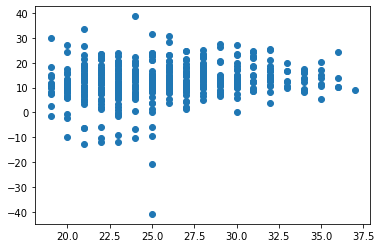

In [13]:
plt.scatter(nba["Age"], nba["Player Efficiency Rating"])
plt.show()

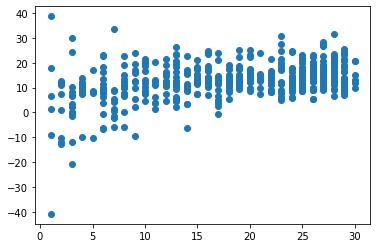

In [14]:
plt.scatter(nba["Games"], nba["Player Efficiency Rating"])
plt.show()

# 6.Player efficiency rate

In [15]:
x = nba.drop("Player Efficiency Rating", 1)
y = nba['Player Efficiency Rating']
nba = nba.drop("Player Efficiency Rating", 1)
display(nba)

display(y)
x_train, x_test, y_train,y_test = train_test_split(nba, y, test_size = 0.25)

,Age,Games,Minutes Played,True Shooting(%),Threepoint Attempt rate,Free throw attempt rate
0,21,28,0.370572,0.599,0.000000,0.541
1,24,6,0.015441,0.125,0.250000,0.000
2,27,27,0.690282,0.592,0.406362,0.397
3,23,26,0.792916,0.641,0.015000,0.469
4,35,18,0.435967,0.542,0.298000,0.093
...,...,...,...,...,...,...
492,28,28,0.747502,0.559,0.298000,0.346
493,32,23,0.537693,0.597,0.104000,0.169
494,22,26,0.818347,0.598,0.349000,0.577
495,28,15,0.327884,0.569,0.133000,0.242


0      15.1
1      -6.9
2      15.9
3      22.7
4      15.2
       ... 
492    16.6
493    18.5
494    22.9
495    18.2
496    20.5
Name: Player Efficiency Rating, Length: 497, dtype: float64

In [16]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(372, 6) (372,)
(125, 6) (125,)


In [17]:
lrm = linear_model.LinearRegression()
lrm_model = lrm.fit(x_train, y_train)
lrm_predictions = lrm.predict(x_test)

In [18]:
lrm_predictions[0:10]

array([14.45227881,  9.44852932, 12.90053304, 11.80724166, 17.39348853,
       12.97972425, 17.90560318,  7.04616188, 12.90938906,  9.57760904])

Text(0, 0.5, 'Predicted Values')

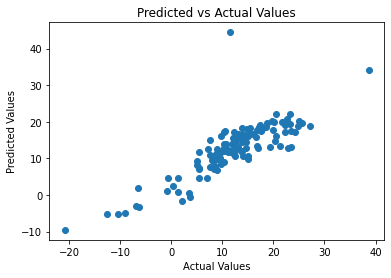

In [19]:
plt.scatter(y_test, lrm_predictions)
plt.title("Predicted vs Actual Values")
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')

In [20]:
print('Score', lrm_model.score(x_test, y_test))

Score 0.6801511954402657
